In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jatai
Processing Record 2 of Set 1 | huarmey
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | san cristobal
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | talaya
Processing Record 11 of Set 1 | korla
Processing Record 12 of Set 1 | ampanihy
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | laem sing
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | haines junction
Processin

Processing Record 36 of Set 4 | yaan
Processing Record 37 of Set 4 | bethel
Processing Record 38 of Set 4 | bilibino
Processing Record 39 of Set 4 | whitehorse
Processing Record 40 of Set 4 | sovetskaya
Processing Record 41 of Set 4 | ferzikovo
Processing Record 42 of Set 4 | kindu
Processing Record 43 of Set 4 | fleurus
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | castries
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | yeehaw junction
City not found. Skipping...
Processing Record 49 of Set 4 | candido de abreu
Processing Record 50 of Set 4 | asuncion
Processing Record 1 of Set 5 | mar del plata
Processing Record 2 of Set 5 | mersing
Processing Record 3 of Set 5 | butaritari
Processing Record 4 of Set 5 | san angelo
Processing Record 5 of Set 5 | kaseda
Processing Record 6 of Set 5 | vila franca do campo
Processing Record 7 of Set 5 | hay river
Processing Record 8 of Set 5 | grand forks
Pro

Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | tautira
Processing Record 33 of Set 8 | maler kotla
Processing Record 34 of Set 8 | kalmunai
Processing Record 35 of Set 8 | kaeo
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | labuan
Processing Record 38 of Set 8 | garowe
Processing Record 39 of Set 8 | natal
Processing Record 40 of Set 8 | mayumba
Processing Record 41 of Set 8 | la fria
Processing Record 42 of Set 8 | mvomero
Processing Record 43 of Set 8 | cidreira
Processing Record 44 of Set 8 | touros
Processing Record 45 of Set 8 | samarai
Processing Record 46 of Set 8 | obihiro
Processing Record 47 of Set 8 | mopti
Processing Record 48 of Set 8 | salinas
Processing Record 49 of Set 8 | alice springs
Processing Record 50 of Set 8 | ratnagiri
Processing Record 1 of Set 9 | padang
Processing Record 2 of Set 9 | hasaki
Processing Record 3 of Set 9 | coihaique
Processing Record 4 of Set 9 | xining
Processing Record 5 of Set 9 | chokurdakh
P

Processing Record 21 of Set 12 | illapel
Processing Record 22 of Set 12 | sarangani
Processing Record 23 of Set 12 | kijang
Processing Record 24 of Set 12 | shelby
Processing Record 25 of Set 12 | kashi
Processing Record 26 of Set 12 | rosita
Processing Record 27 of Set 12 | melfi
Processing Record 28 of Set 12 | siavonga
Processing Record 29 of Set 12 | ketchikan
Processing Record 30 of Set 12 | arlit
Processing Record 31 of Set 12 | porbandar
Processing Record 32 of Set 12 | pahrump
Processing Record 33 of Set 12 | colimes
Processing Record 34 of Set 12 | coquimbo
Processing Record 35 of Set 12 | olafsvik
Processing Record 36 of Set 12 | praia da vitoria
Processing Record 37 of Set 12 | ornskoldsvik
Processing Record 38 of Set 12 | codrington
Processing Record 39 of Set 12 | grand gaube
Processing Record 40 of Set 12 | waihi
Processing Record 41 of Set 12 | brae
Processing Record 42 of Set 12 | bria
Processing Record 43 of Set 12 | medford
Processing Record 44 of Set 12 | half moon b

In [10]:
len(city_data)

586

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jatai,-17.8814,-51.7144,77.18,20,12,3.20,BR,2021-09-20 02:57:08
1,Huarmey,-10.0681,-78.1522,61.29,81,13,10.36,PE,2021-09-20 02:57:24
2,Kapaa,22.0752,-159.3190,80.58,71,83,4.00,US,2021-09-20 02:57:25
3,Ribeira Grande,38.5167,-28.7000,69.62,68,25,11.92,PT,2021-09-20 02:57:26
4,Clyde River,70.4692,-68.5914,28.54,61,85,2.68,CA,2021-09-20 02:57:26
5,Barrow,71.2906,-156.7887,30.22,86,75,16.11,US,2021-09-20 02:57:26
6,Atuona,-9.8000,-139.0333,78.24,75,13,21.07,PF,2021-09-20 02:54:56
7,San Cristobal,7.7669,-72.2250,73.58,97,79,1.95,VE,2021-09-20 02:57:27
8,College,64.8569,-147.8028,49.59,64,75,2.30,US,2021-09-20 02:57:27
9,Talaya,61.3833,152.7500,40.33,96,100,4.12,RU,2021-09-20 02:57:28


In [13]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

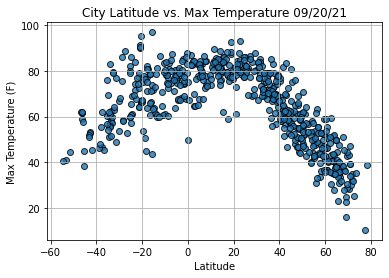

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8,label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

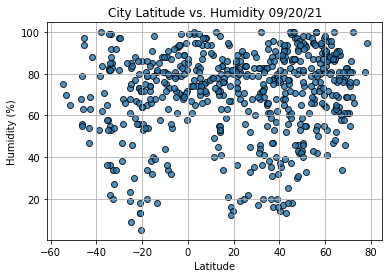

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

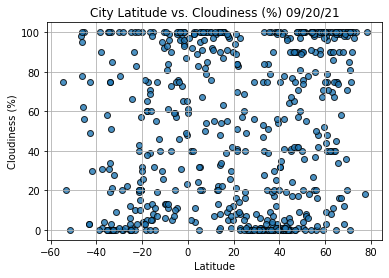

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

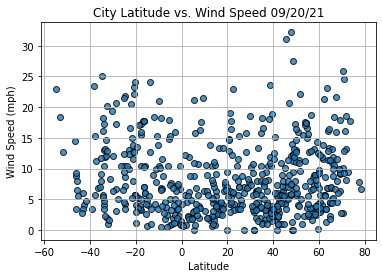

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City                     Souillac
Country                        MU
Date          2021-09-20 02:57:29
Lat                      -20.5167
Lng                       57.5167
Max Temp                    66.58
Humidity                       72
Cloudiness                     20
Wind Speed                   5.75
Name: 13, dtype: object

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kapaa,US,2021-09-20 02:57:25,22.0752,-159.3190,80.58,71,83,4.00
3,Ribeira Grande,PT,2021-09-20 02:57:26,38.5167,-28.7000,69.62,68,25,11.92
4,Clyde River,CA,2021-09-20 02:57:26,70.4692,-68.5914,28.54,61,85,2.68
5,Barrow,US,2021-09-20 02:57:26,71.2906,-156.7887,30.22,86,75,16.11
7,San Cristobal,VE,2021-09-20 02:57:27,7.7669,-72.2250,73.58,97,79,1.95
...,...,...,...,...,...,...,...,...,...
579,Homestead,US,2021-09-20 03:02:21,25.4687,-80.4776,82.00,89,1,3.44
580,Mahon,ES,2021-09-20 03:02:28,39.8885,4.2658,66.76,77,20,3.44
581,Sioux Lookout,CA,2021-09-20 03:02:28,50.1001,-91.9170,70.61,82,100,14.58
584,Vasai,IN,2021-09-20 03:02:29,19.4700,72.8000,77.09,82,42,6.58


In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kapaa,US,2021-09-20 02:57:25,22.0752,-159.3190,80.58,71,83,4.00
3,Ribeira Grande,PT,2021-09-20 02:57:26,38.5167,-28.7000,69.62,68,25,11.92
4,Clyde River,CA,2021-09-20 02:57:26,70.4692,-68.5914,28.54,61,85,2.68
5,Barrow,US,2021-09-20 02:57:26,71.2906,-156.7887,30.22,86,75,16.11
7,San Cristobal,VE,2021-09-20 02:57:27,7.7669,-72.2250,73.58,97,79,1.95


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

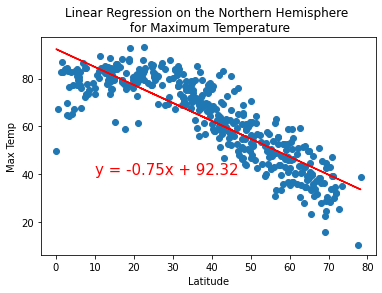

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

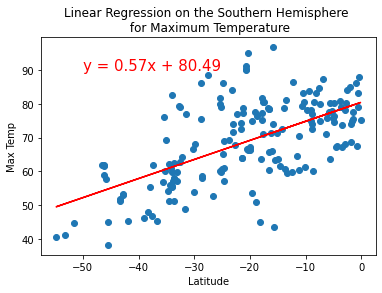

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

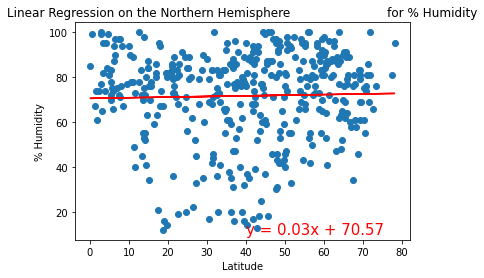

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

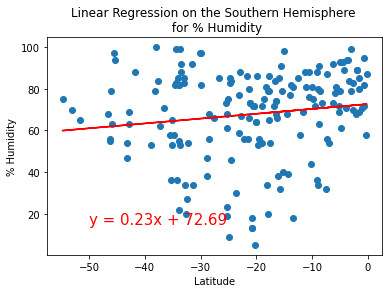

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


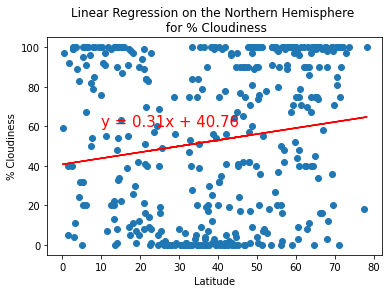

In [55]:
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Cloudiness"]
plot_linear_regression(x_value,y_value,'Linear Regression on the Northern Hemisphere \n for % Cloudiness',"% Cloudiness",(10,60))

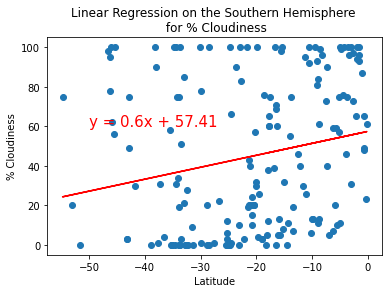

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

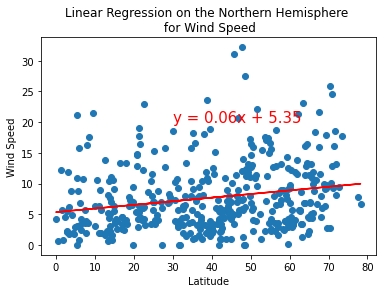

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(30,20))

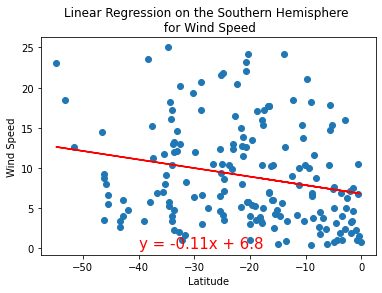

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-40,0))